In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Data Cleaning
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Removing Cabin column
df.drop(['Cabin'],inplace = True, axis=1)

<Axes: >

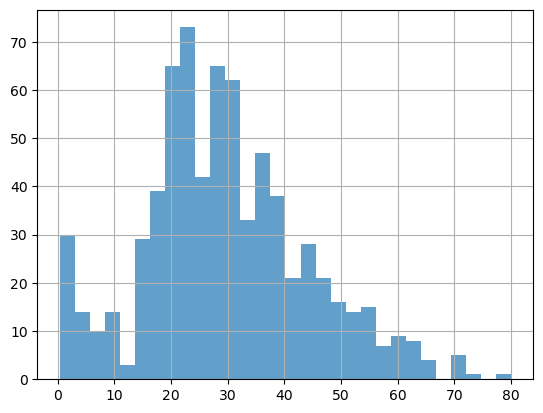

In [5]:
df["Age"].hist(bins=30,alpha=0.7)

<Axes: xlabel='Survived', ylabel='count'>

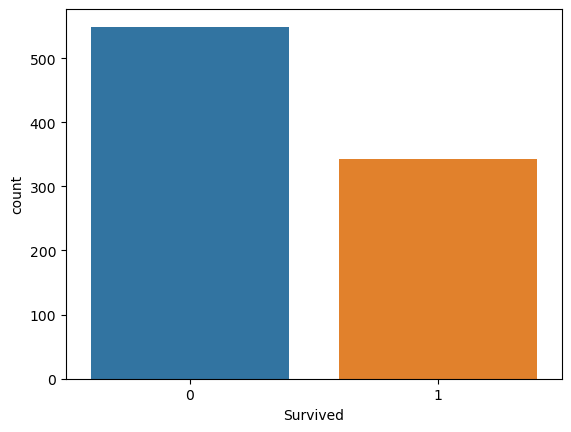

In [6]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

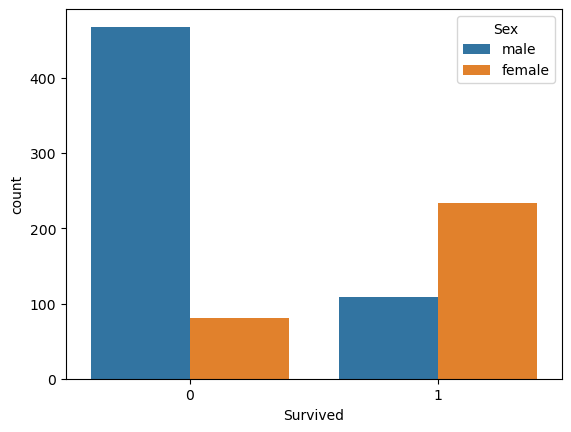

In [7]:
sns.countplot(x='Survived', hue= 'Sex', data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

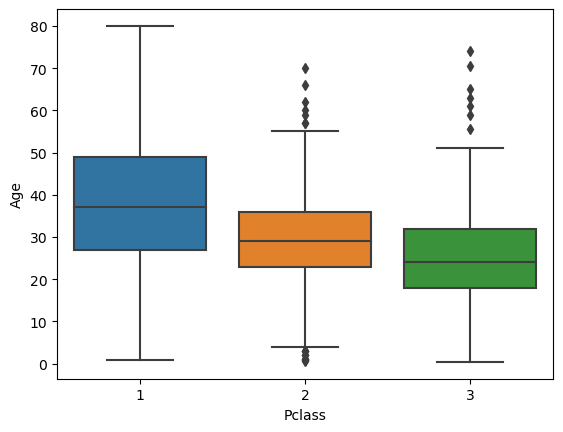

In [8]:
sns.boxplot(x="Pclass", y="Age", data=df)

In [9]:
#Replace null values from Age column with mean of age
mn_age = np.mean(df['Age'])
mn_age

29.69911764705882

In [10]:
df["Age"].fillna(mn_age, inplace=True)

In [11]:
#Replace null values from Embarked column with mode of data
df['Embarked'].fillna(df.Embarked.mode()[0],inplace = True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#Convert Male and Female to numeric encoding 
Sex = pd.get_dummies(df['Sex'],drop_first=True)

In [14]:
#Convert Embarked values to numeric encoding
Embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [15]:
df.drop(["Name","Sex","Ticket","Embarked"], inplace=True, axis=1)

In [16]:
df = pd.concat([df,Sex,Embarked], axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.000000,1,0,7.2500,1,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0


In [17]:
#Creating train and test data
y = df.iloc[:,1]

In [18]:
X = df.iloc[:,2:]

In [19]:
X.shape

(891, 8)

In [20]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [33]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
y_pred = model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.7932960893854749

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
model = KNeighborsClassifier()

In [65]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
y_pred = model.predict(x_test)

In [67]:
accuracy_score(y_test, y_pred)

0.7430167597765364

In [68]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[97, 24],
       [22, 36]], dtype=int64)

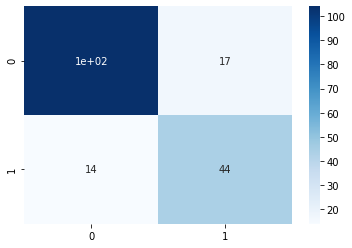

In [71]:
sns.heatmap(con_matrix,annot = True, cmap='Blues')

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
model = GaussianNB()

In [45]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
y_pred = model.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred)

0.8100558659217877

In [48]:
from sklearn.svm import SVC

In [49]:
model = SVC()

In [50]:
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred = model.predict(x_test)

In [52]:
accuracy_score(y_test, y_pred)

0.7206703910614525

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()

In [55]:
model.fit(x_train, y_train)

C:\Users\Nitin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = model.predict(x_test)

In [57]:
accuracy_score(y_test, y_pred)

0.8268156424581006

In [58]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)

In [59]:
con_matrix

array([[104,  17],
       [ 14,  44]], dtype=int64)

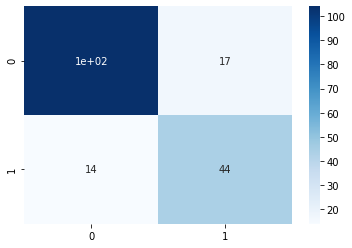

In [61]:
sns.heatmap(con_matrix, annot= True, cmap='Blues')

In [62]:
y_test.shape

(179,)